In [1]:
# Importing Libraries:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
#Import and read data csv file
insurance_data= pd.read_csv("./resources/insurance_dataset.csv")
insurance_data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [3]:
#Data shape
print(f'Shape of the data: {insurance_data.shape}')
print(f'There are {insurance_data.shape[0]} rows in the Medical Insurance data.')

Shape of the data: (1000000, 12)
There are 1000000 rows in the Medical Insurance data.


In [4]:
#Data type
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [5]:
#Check out columns
insurance_data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [6]:
#Check if the DataFrame contains any missing values or null values.
insurance_data.isnull().any()

age                       False
gender                    False
bmi                       False
children                  False
smoker                    False
region                    False
medical_history           False
family_medical_history    False
exercise_frequency        False
occupation                False
coverage_level            False
charges                   False
dtype: bool

In [7]:
#Statistical Data Description
insurance_data.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [8]:
#Categorical of Data Description
insurance_data.describe(include=['O'])

,gender,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,2,4,4,4,4,4,3
top,male,yes,northeast,None,None,Rarely,Unemployed,Basic
freq,500107,500129,250343,250762,250404,250538,250571,333515


In [9]:
#Values for 'children' column
sorted(insurance_data['children'].unique())

[0, 1, 2, 3, 4, 5]

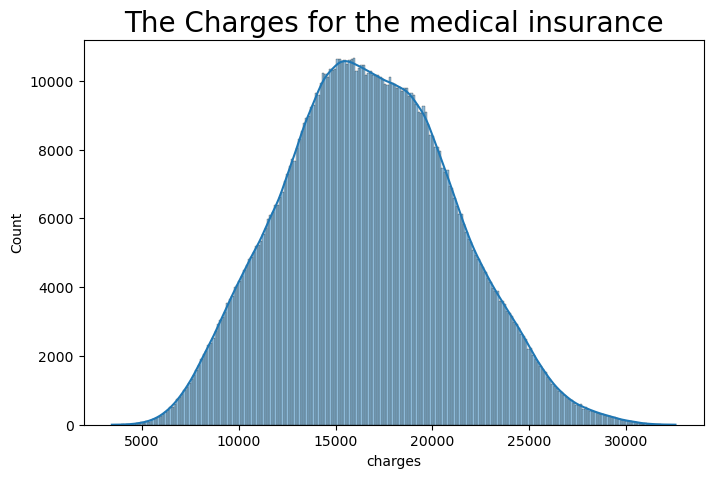

In [10]:

#Medical Insurance Charges Histogram
plt.figure(figsize=(8,5))
sns.histplot(insurance_data['charges'], kde=True)
plt.title('The Charges for the medical insurance', fontsize=20)
plt.show()



In [11]:
#mean & median
insurance_data['charges'].mean(), insurance_data['charges'].median()

(16735.117480593424, 16622.12797345963)

Text(0.5, 1.0, 'Medical history and Insurnce Price')

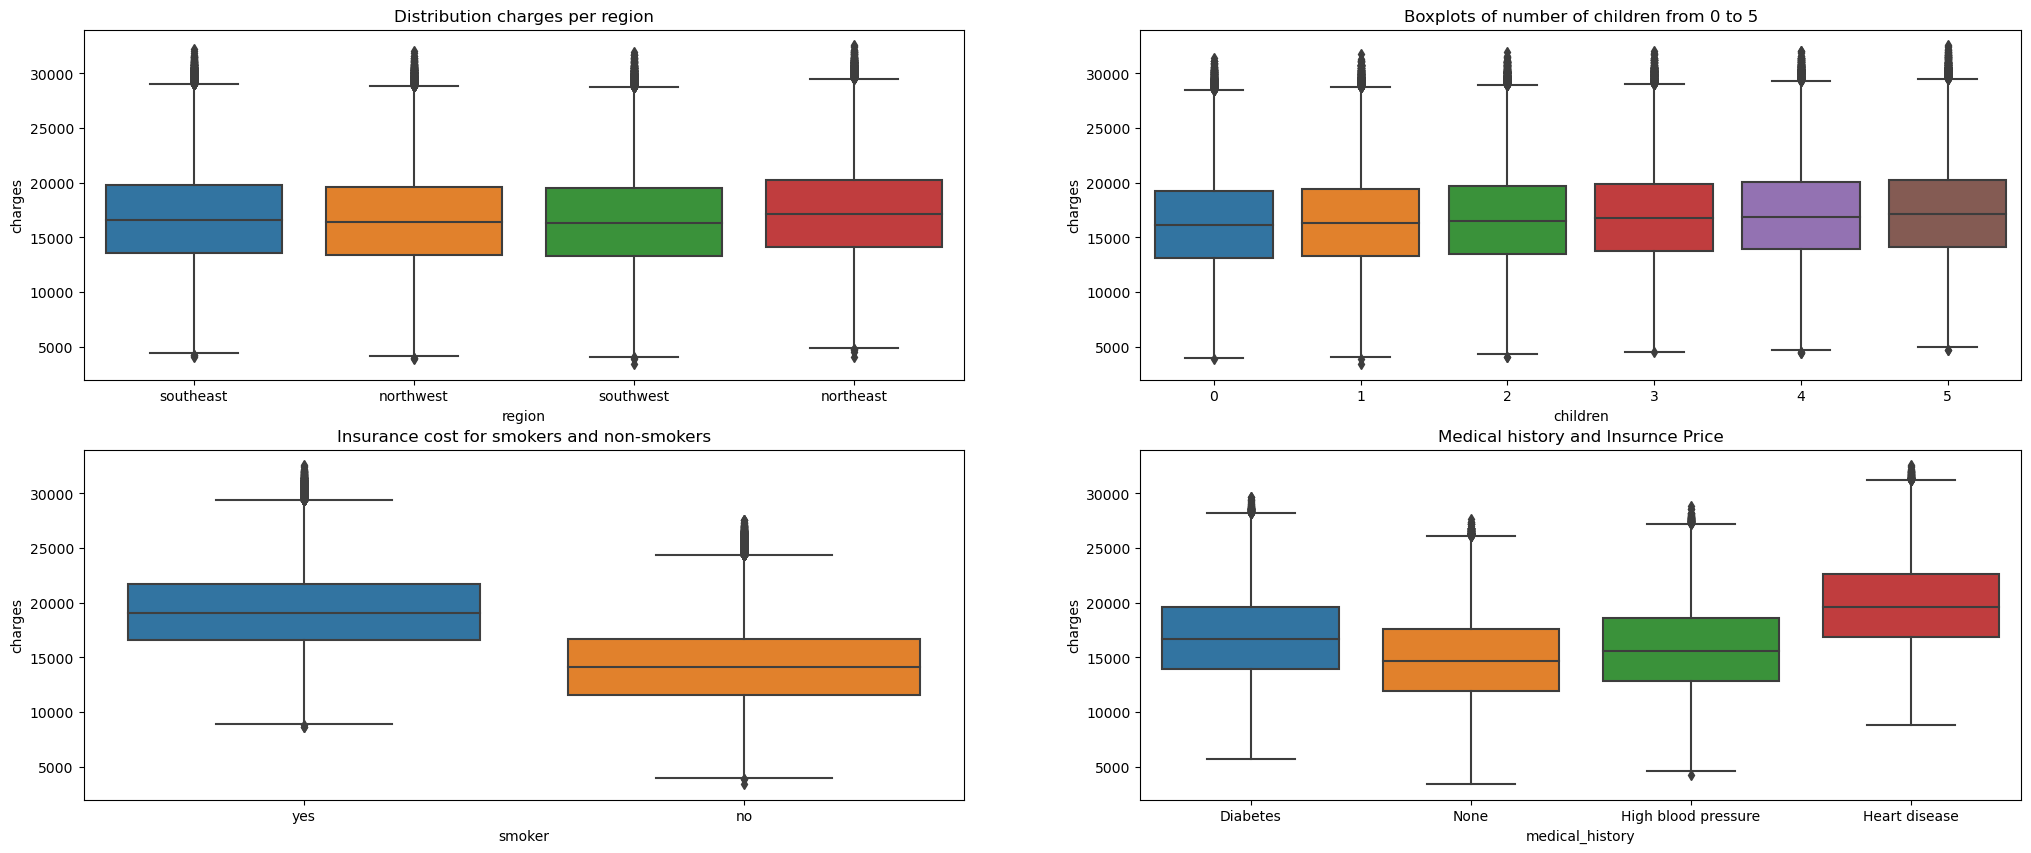

In [12]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = insurance_data)
plt.title("Distribution charges per region")
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = insurance_data)
plt.title("Boxplots of number of children from 0 to 5")
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = insurance_data)
plt.title("Insurance cost for smokers and non-smokers")
plt.subplot(2,2,4)
sns.boxplot(x="medical_history", y="charges", data=insurance_data)
plt.title("Medical history and Insurnce Price")

Text(0.5, 1.0, 'How the family medical histry impact of the insurance cost')

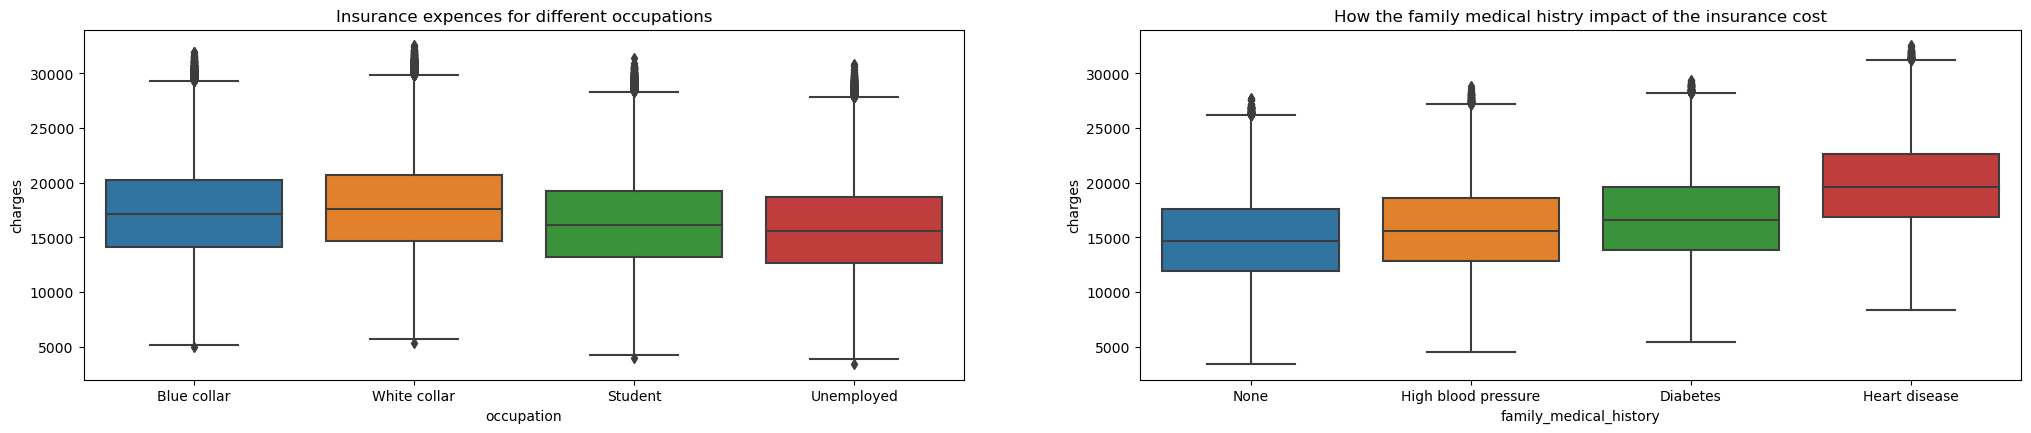

In [13]:
#set figure size
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x="occupation", y="charges", data=insurance_data)
plt.title("Insurance expences for different occupations")

plt.subplot(2,2,2)
sns.boxplot(x = 'family_medical_history', y = 'charges', data = insurance_data)
plt.title("How the family medical histry impact of the insurance cost")


<Axes: xlabel='gender', ylabel='charges'>

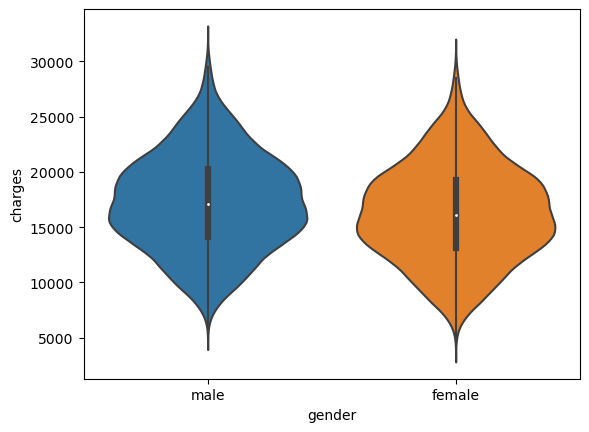

In [14]:
# Plot for Column 'gender' @ 'charges
sns.violinplot(y='charges', x='gender', data=insurance_data, split=True)

In [16]:
#Function for the summary and distribution of numeretic attributes
def summary(x):
    x_min = insurance_data[x].min()
    x_max = insurance_data[x].max()
    Q1 = insurance_data[x].quantile(0.25)
    Q2 = insurance_data[x].quantile(0.50)
    Q3 = insurance_data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(insurance_data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = insurance_data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=insurance_data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(insurance_data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [17]:
#The Boxplot  and calculation of the measure the values for various attributes 

def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. 
                (x_l, y),(x_r, _) = line.get_xydata()
                
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  
                    
                    ax.text(x_line_center, y_line_center, 
                            '%.2f' % y,
                            verticalalignment='center', 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = insurance_data.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = insurance_data[x].skew()
    Q1 = insurance_data[x].quantile(0.25)
    Q3 = insurance_data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((insurance_data[x] < (Q1 - 1.5 * IQR)) | (insurance_data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {insurance_data[x].mean()}')
    print(f'Median {x.capitalize()} = {insurance_data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')  

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 29.0
Q2(Median)            : 41.0
Q3                    : 53.0
Age(max) : 65


C:\Users\User\AppData\Local\Temp\ipykernel_22492\2789181986.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(insurance_data[x], color = 'r')


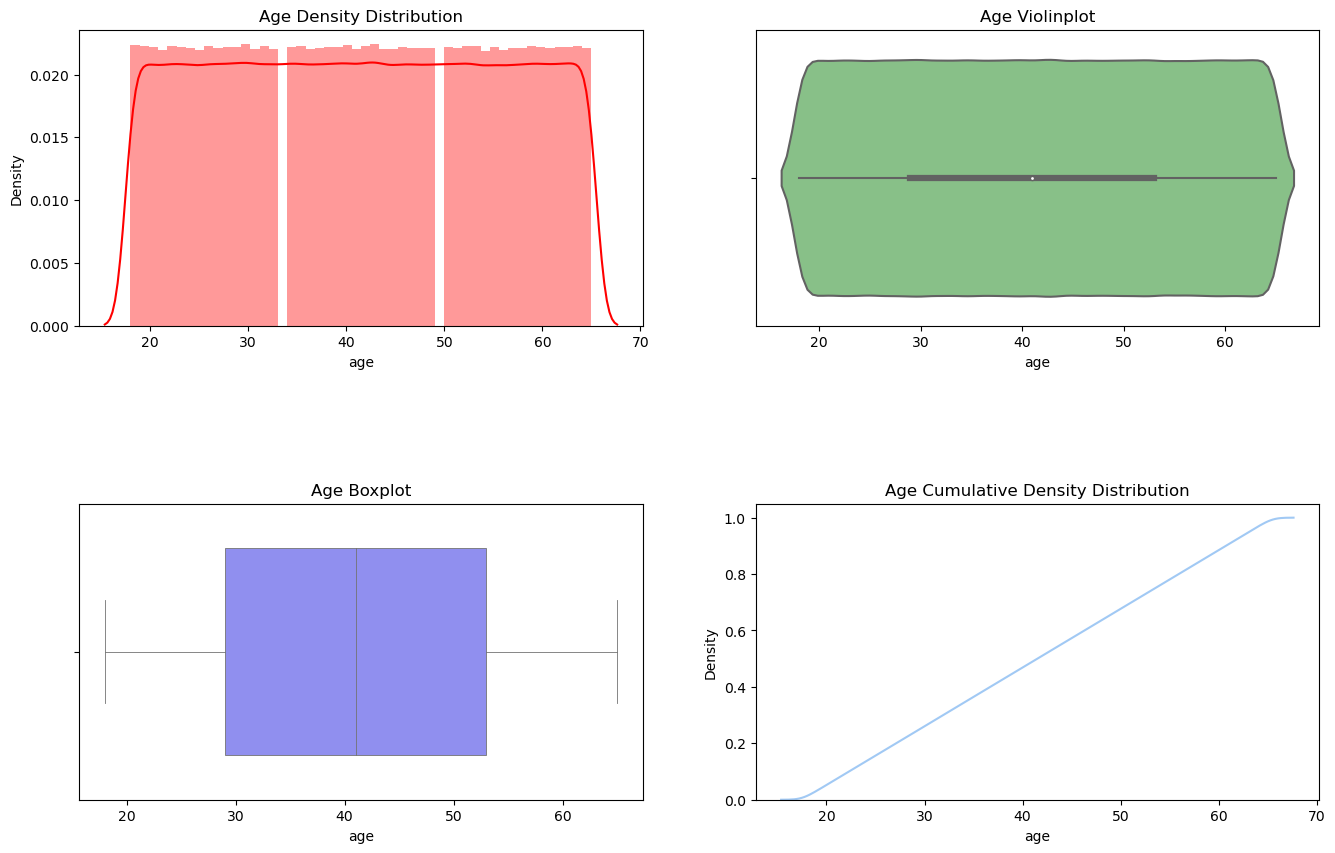

In [18]:
#Age distribution 
summary('age')

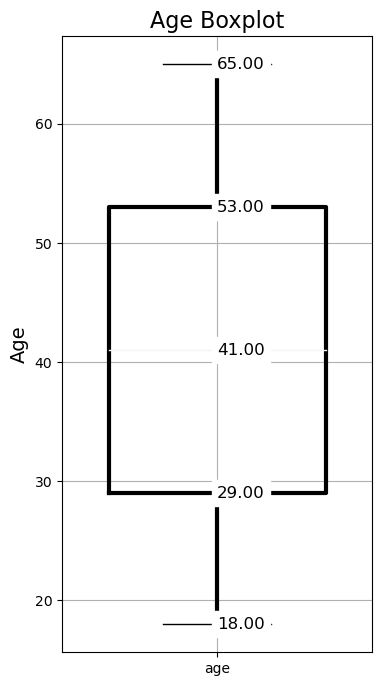

Mean Age = 41.495282
Median Age = 41.0
Skewness of age: 0.0007369673213142026.
Total number of outliers in age distribution: 0.


In [19]:
box_plot('age')

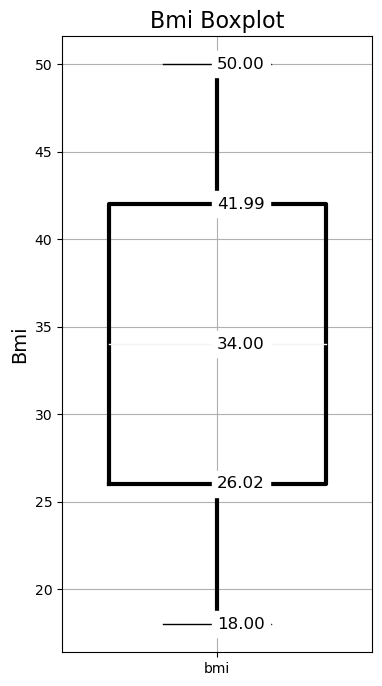

Mean Bmi = 34.00183867000001
Median Bmi = 34.0
Skewness of bmi: -0.0003814812940961392.
Total number of outliers in bmi distribution: 0.


In [20]:
box_plot('bmi')

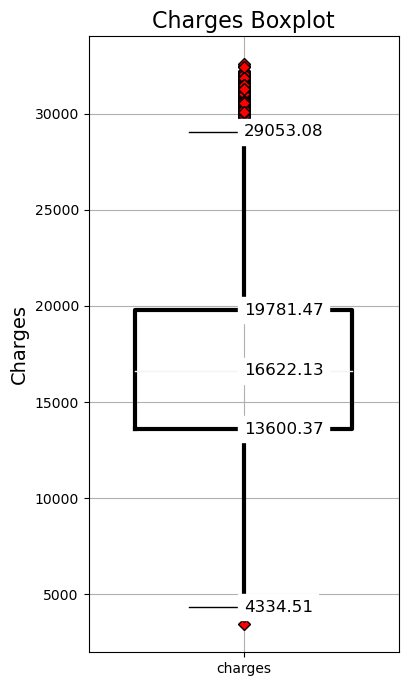

Mean Charges = 16735.117480593424
Median Charges = 16622.12797345963
Skewness of charges: 0.13026800155798787.
Total number of outliers in charges distribution: 2217.


In [21]:
box_plot('charges')

In [22]:
# measuring the of ‘bmi’, ‘age’ and ‘charges’ columns and storing to new dataframe
Skew = pd.DataFrame({'Skewness Value' : [stats.skew(insurance_data.bmi), stats.skew(insurance_data.age),stats.skew(insurance_data.charges)]},
                    index=['bmi','age','charges'])
Skew

,Skewness Value
bmi,-0.000381
age,0.000737
charges,0.130268


In [23]:
#count of smokers and non-smokers
insurance_data.smoker.value_counts()

yes    500129
no     499871
Name: smoker, dtype: int64

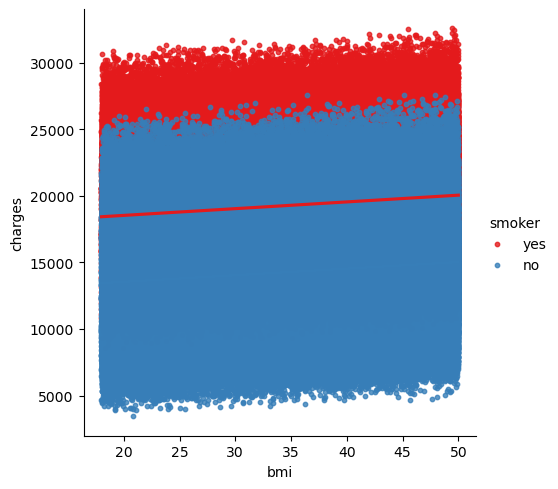

In [24]:
sns.lmplot( x='bmi',y='charges', data=insurance_data, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

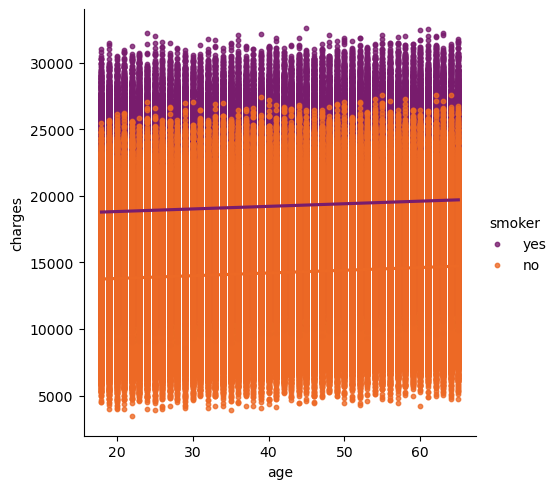

In [25]:
sns.lmplot(x='age', y='charges', hue='smoker', data=insurance_data, palette='inferno', scatter_kws={"s": 10})
plt.show()

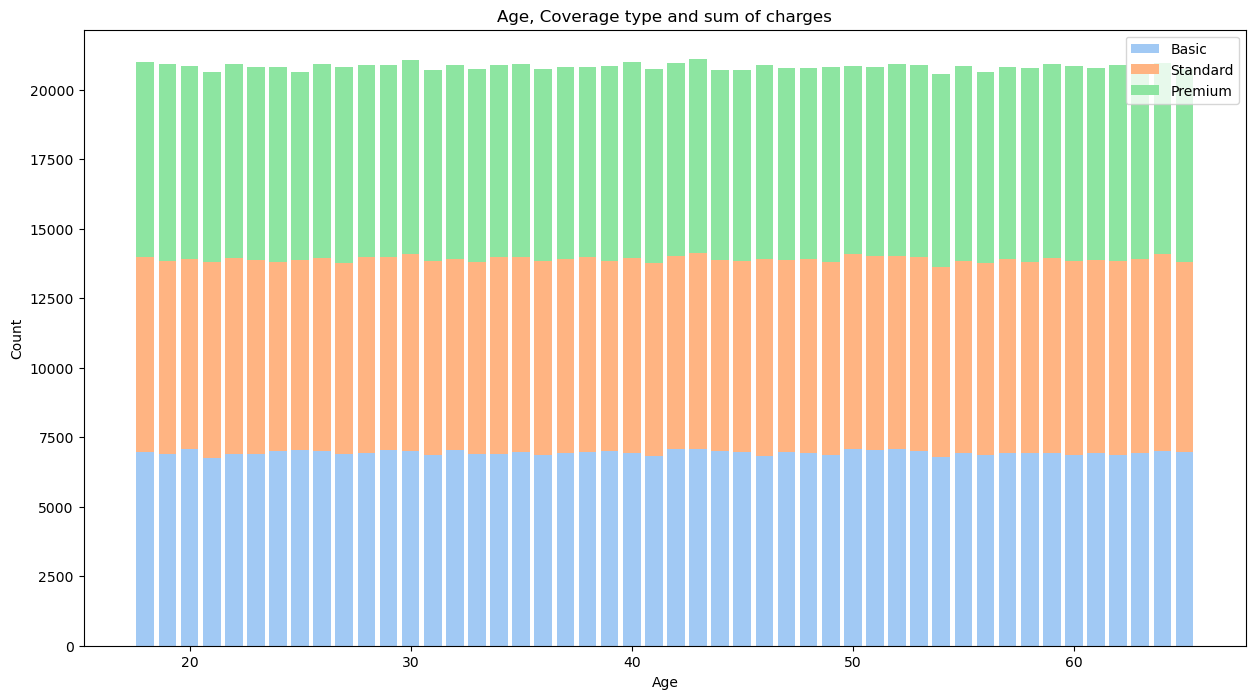

In [26]:
#Group data by age and coverage level
coverage_by_age= insurance_data.groupby(["age", "coverage_level"])["charges"].count().reset_index()

#Pivot data 
age_coverage_pivot = coverage_by_age.pivot(index="age", columns="coverage_level", values="charges").fillna(0)

#Bar chart of coverage levels for different age groups
plt.figure(figsize=(15, 8))
plt.bar(age_coverage_pivot.index, age_coverage_pivot["Basic"], label="Basic")
plt.bar(age_coverage_pivot.index, age_coverage_pivot["Standard"], bottom=age_coverage_pivot["Basic"], label="Standard")
plt.bar(age_coverage_pivot.index, age_coverage_pivot["Premium"], bottom=age_coverage_pivot["Basic"]+age_coverage_pivot["Standard"], label="Premium")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age, Coverage type and sum of charges")
plt.legend()
plt.show()

In [27]:
#T-test to analyse the effect of gender on the bmi
Ho = "bmi of males does not differ significantly from females"   
Ha = "bmi of males differ significantly from females"   

x = np.array(insurance_data[insurance_data.gender == 'male'].bmi)  
y = np.array(insurance_data[insurance_data.gender == 'female'].bmi) 

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  
#Conclusion: Accepting Null hypothesis as the p-value is greater than 0.05. 
# Hence, BMI does not change significantly on basis of Gender.

print(p_value)


0.2985618034386878


In [28]:
#Is the proportion of smokers significantly different in different genders
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

# applying Chi_square test
crosstab = pd.crosstab(insurance_data['gender'],insurance_data['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.982491996724872


In [29]:
# Encoding
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

In [30]:
#top 5 records, after encoding
insurance_data.head(5)

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,medical_history_Heart disease,...,family_medical_history_High blood pressure,family_medical_history_None,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,1,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
1,25,25.38,2,20390.899218,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,38,44.88,2,20204.476302,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,25,19.89,0,11789.029843,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,49,38.21,3,19268.309838,1,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1


In [31]:
# Columns of dataset
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'gender_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'medical_history_Heart disease', 'medical_history_High blood pressure',
       'medical_history_None', 'family_medical_history_Heart disease',
       'family_medical_history_High blood pressure',
       'family_medical_history_None', 'exercise_frequency_Never',
       'exercise_frequency_Occasionally', 'exercise_frequency_Rarely',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_White collar', 'coverage_level_Premium',
       'coverage_level_Standard'],
      dtype='object')

In [32]:
# Rearranging columns to see better
train_data = insurance_data[['age', 'bmi', 'children', 'gender_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']]
train_data.head(3)

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,46,21.45,5,1,1,0,1,0,20460.307669
1,25,25.38,2,0,1,1,0,0,20390.899218
2,38,44.88,2,1,1,0,0,1,20204.476302


In [33]:
# Splitting Independent & Dependent Feature
#x needs not include into the charges colum and y needs to only include
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]



In [34]:
# top 3 records of Independent feature:
X.head(3)

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,46,21.45,5,1,1,0,1,0
1,25,25.38,2,0,1,1,0,0
2,38,44.88,2,1,1,0,0,1


In [35]:
# top 3 records of Dependent Feature
y.head(3)

0    20460.307669
1    20390.899218
2    20204.476302
Name: charges, dtype: float64

In [36]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [37]:
# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.35888415982566035
12538556.731703557


In [39]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3588841560209286
12538556.806114204


In [40]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3588818666463318
12538601.580321085


In [41]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.2266596620078818
15124523.671404177


In [42]:


# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))

